In [7]:
pip install prophet

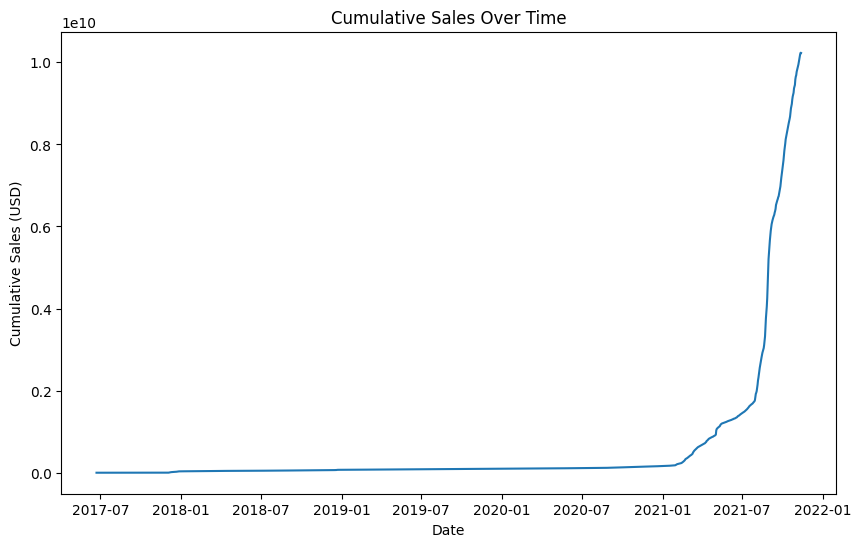

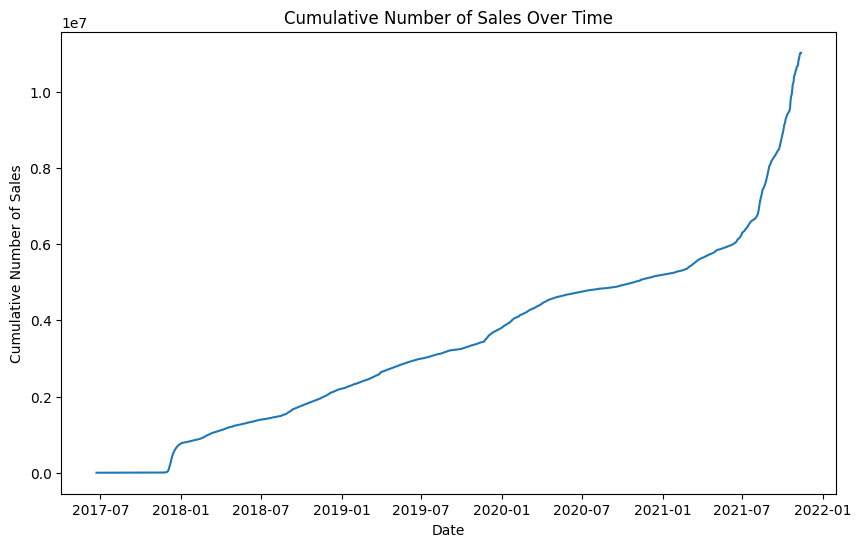

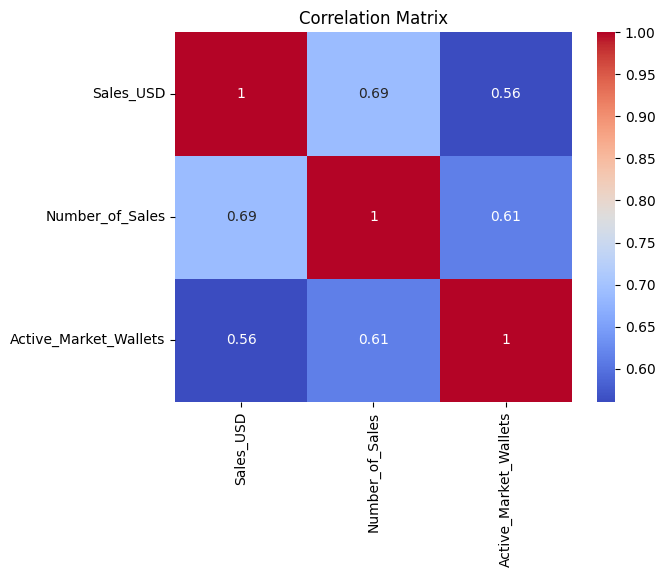

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sales_USD   No. Observations:                 1605
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -28079.266
Date:                Wed, 29 May 2024   AIC                          56170.532
Time:                        06:11:57   BIC                          56202.814
Sample:                             0   HQIC                         56182.518
                               - 1605                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1247      0.005    -22.698      0.000      -0.135      -0.114
ar.L2         -0.3127      0.006    -50.587      0.000      -0.325      -0.301
ar.L3         -0.0981      0.006    -15.987      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


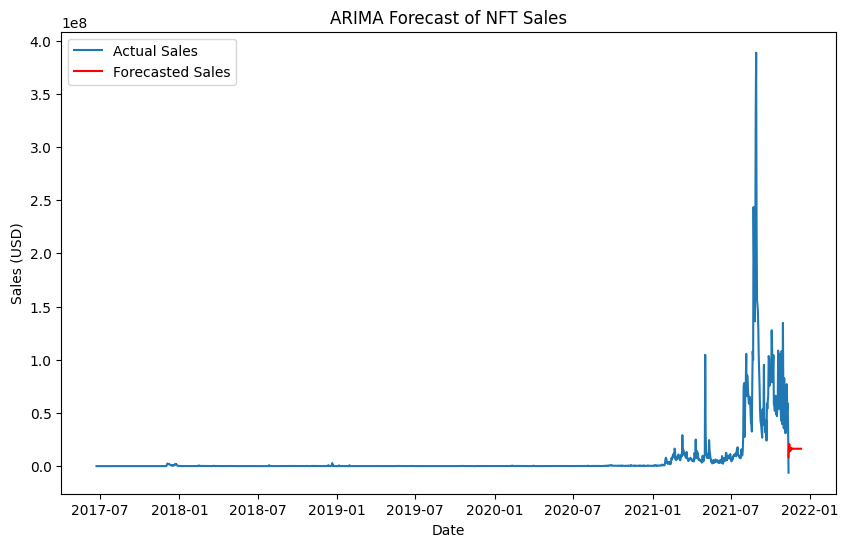

ARIMA Model Mean Squared Error: 2718452527053213.0


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3e_wpm_2/vwwfm7ob.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3e_wpm_2/9g5s1r0z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15019', 'data', 'file=/tmp/tmp3e_wpm_2/vwwfm7ob.json', 'init=/tmp/tmp3e_wpm_2/9g5s1r0z.json', 'output', 'file=/tmp/tmp3e_wpm_2/prophet_modellqyg2l8d/prophet_model-20240529061158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:11:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


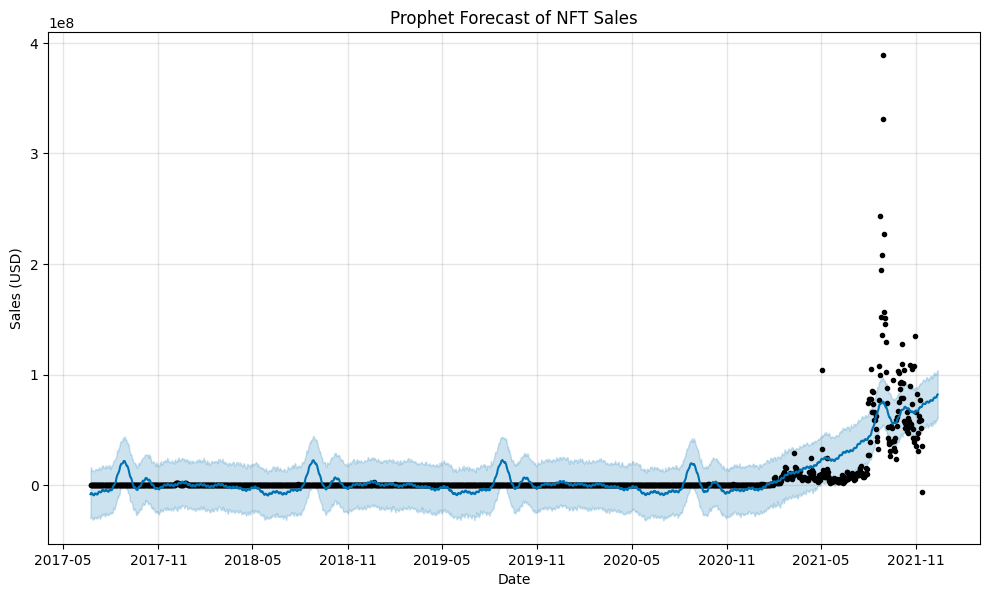

Prophet Model Mean Squared Error: 1071393588394664.6


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from prophet import Prophet

# Load the dataset
df = pd.read_csv('/content/NFTlyze Dataset.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Exploratory Data Analysis (EDA)
# Plot the cumulative sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Sales_USD_cumsum')
plt.title('Cumulative Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales (USD)')
plt.show()

# Plot the number of sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Number_of_Sales_cumsum')
plt.title('Cumulative Number of Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Sales')
plt.show()

# Correlation matrix
corr_matrix = df[['Sales_USD', 'Number_of_Sales', 'Active_Market_Wallets']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ARIMA Model
# Prepare data for ARIMA model
df.set_index('Date', inplace=True)
df_sales = df['Sales_USD'].dropna()  # Drop NA values for sales

# Train ARIMA model
model_arima = ARIMA(df_sales, order=(5,1,0))
model_fit_arima = model_arima.fit()
print(model_fit_arima.summary())

# Forecast future sales
forecast_arima = model_fit_arima.forecast(steps=30)
forecast_dates_arima = pd.date_range(start=df_sales.index[-1], periods=30, freq='D')

plt.figure(figsize=(10, 6))
plt.plot(df_sales.index, df_sales, label='Actual Sales')
plt.plot(forecast_dates_arima, forecast_arima, label='Forecasted Sales', color='red')
plt.title('ARIMA Forecast of NFT Sales')
plt.xlabel('Date')
plt.ylabel('Sales (USD)')
plt.legend()
plt.show()

# Evaluate ARIMA model
mse_arima = mean_squared_error(df_sales[-30:], forecast_arima[:30])
print(f'ARIMA Model Mean Squared Error: {mse_arima}')

# Prophet Model
# Prepare data for Prophet model
df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Sales_USD': 'y'})

# Train Prophet model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Forecast future sales
future_prophet = model_prophet.make_future_dataframe(periods=30)
forecast_prophet = model_prophet.predict(future_prophet)

# Plot forecast
fig = model_prophet.plot(forecast_prophet)
plt.title('Prophet Forecast of NFT Sales')
plt.xlabel('Date')
plt.ylabel('Sales (USD)')
plt.show()

# Evaluate Prophet model
actual_prophet = df_prophet['y'][-30:]
predicted_prophet = forecast_prophet['yhat'][-30:]
mse_prophet = mean_squared_error(actual_prophet, predicted_prophet)
print(f'Prophet Model Mean Squared Error: {mse_prophet}')


In [13]:
pip install requests

           Date  Sales_USD_cumsum  Number_of_Sales_cumsum  \
1608 2021-11-15               NaN                     NaN   
1609 2021-11-16               NaN                     NaN   
1610 2021-11-17               NaN                     NaN   
1611 2021-11-18               NaN                     NaN   
1612 2021-11-19               NaN                     NaN   

      Active_Market_Wallets_cumsum  Primary_Sales_cumsum  \
1608                           NaN                   NaN   
1609                           NaN                   NaN   
1610                           NaN                   NaN   
1611                           NaN                   NaN   
1612                           NaN                   NaN   

      Secondary_Sales_cumsum  AverageUSD_cum  Sales_USD  Number_of_Sales  \
1608                     NaN             NaN     1200.0             12.0   
1609                     NaN             NaN     1300.0             13.0   
1610                     NaN             NaN

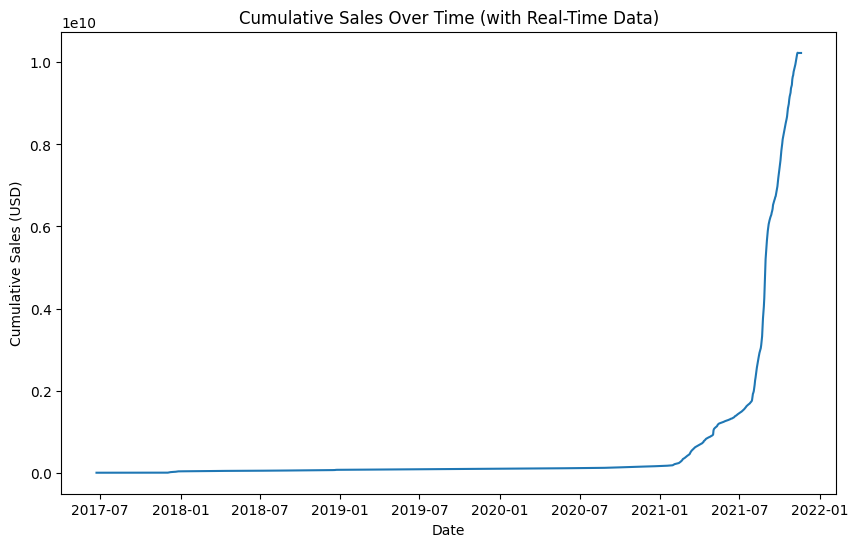

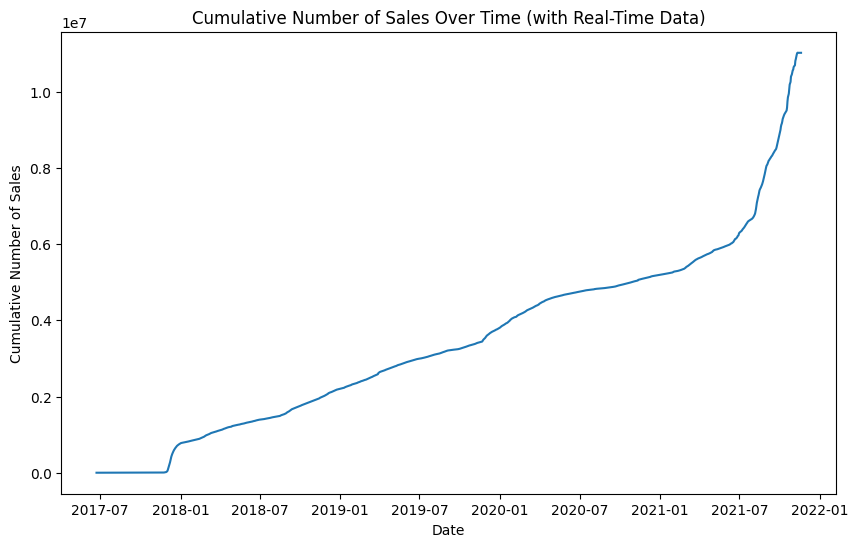

In [16]:
import pandas as pd
from datetime import datetime, timedelta

# Load the existing dataset
df = pd.read_csv('/content/NFTlyze Dataset.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

def fetch_mock_real_time_data():
    # Generate mock data for the next 7 days
    base_date = df['Date'].max() + timedelta(days=1)
    mock_data = []
    for i in range(7):
        date = base_date + timedelta(days=i)
        sales_usd = 1000 + i * 100  # Example incremental sales
        number_of_sales = 10 + i  # Example incremental sales number
        active_market_wallets = 5 + i  # Example incremental wallets
        primary_sales = 2 + i  # Example incremental primary sales
        mock_data.append({
            'Date': date,
            'Sales_USD': sales_usd,
            'Number_of_Sales': number_of_sales,
            'Active_Market_Wallets': active_market_wallets,
            'Primary_Sales': primary_sales
        })
    return mock_data

# Fetch mock real-time data
real_time_data = fetch_mock_real_time_data()

# Convert real-time data to DataFrame
real_time_df = pd.DataFrame(real_time_data)

# Convert 'Date' column to datetime
real_time_df['Date'] = pd.to_datetime(real_time_df['Date'])

# Append real-time data to the existing dataset
updated_df = pd.concat([df, real_time_df], ignore_index=True)

# Display the updated dataset
print(updated_df.tail())

# Example: Displaying the updated cumulative sales over time
import matplotlib.pyplot as plt
import seaborn as sns

# Recalculate cumulative sales and number of sales
updated_df['Sales_USD_cumsum'] = updated_df['Sales_USD'].cumsum()
updated_df['Number_of_Sales_cumsum'] = updated_df['Number_of_Sales'].cumsum()

plt.figure(figsize=(10, 6))
sns.lineplot(data=updated_df, x='Date', y='Sales_USD_cumsum')
plt.title('Cumulative Sales Over Time (with Real-Time Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales (USD)')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=updated_df, x='Date', y='Number_of_Sales_cumsum')
plt.title('Cumulative Number of Sales Over Time (with Real-Time Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Sales')
plt.show()

In [18]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 11.2 MB/s eta 0:00:00


In [20]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("NFT Market Trends Dashboard"),
    dcc.Graph(id='nft-sales'),
    dcc.Interval(id='interval-component', interval=1*60000, n_intervals=0)  # Update every minute
])

@app.callback(
    Output('nft-sales', 'figure'),
    [Input('interval-component', 'n_intervals')]
)
def update_graph(n):
    df = pd.read_csv('/content/NFTlyze Dataset.csv')  # Replace with real-time data fetching
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df_sales = df['Sales_USD'].dropna()

    trace = go.Scatter(x=df_sales.index, y=df_sales, mode='lines', name='NFT Sales')
    return {'data': [trace], 'layout': go.Layout(title='NFT Sales Over Time')}

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>